# Iris
* https://www.kaggle.com/uciml/iris 
* https://www.kaggle.com/benhamner/python-data-visualizations
* https://www.kaggle.com/ash316/ml-from-scratch-with-iris

<p><a href="https://archive.ics.uci.edu/ml/datasets/iris">Iris dataset</a> 是一個古典的花朵資料集，由英國統計學家 <a href="https://en.wikipedia.org/wiki/Ronald_Fisher">Ronald Fisher</a> 爵士在1936年時，對加斯帕半島上的鳶尾屬花朵所提取的花瓣花萼的長寬數據資料，依照山鳶尾，變色鳶尾，維吉尼亞鳶尾三類進行標示，共150筆資料。</p>

<p>Iris dataset 中包含四種屬性 (Atrributes) 與三種花卉標籤 (Labels)</p>
<h3 id="attributes">Attributes</h3>
<ul>
<li>Sepal length: <strong>花萼長度</strong> (cm)</li>
<li>Sepal width: <strong>花萼寬度</strong> (cm)</li>
<li>Petal length: <strong>花瓣長度</strong> (cm)</li>
<li>Petal width: <strong>花瓣寬度</strong> (cm)</li>
</ul>
<h3 id="labels">Labels</h3>
<ul>
<li>setosa: <strong>山鳶尾</strong></li>
<li>versicolor: <strong>變色鳶尾</strong></li>
<li>virginica: <strong>維吉尼亞鳶尾</strong></li>
</ul>

# 資料視覺化

In [17]:
import pandas as pd
iris = pd.read_csv("data/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
# 將 Species 當成預測的目標
# 計算目標各個類別的數量
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [19]:
# 取得資料的欄位數目與筆數
iris.shape #get the shape of the dataset

(150, 6)

In [20]:
# 檢查資料是否有缺失
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

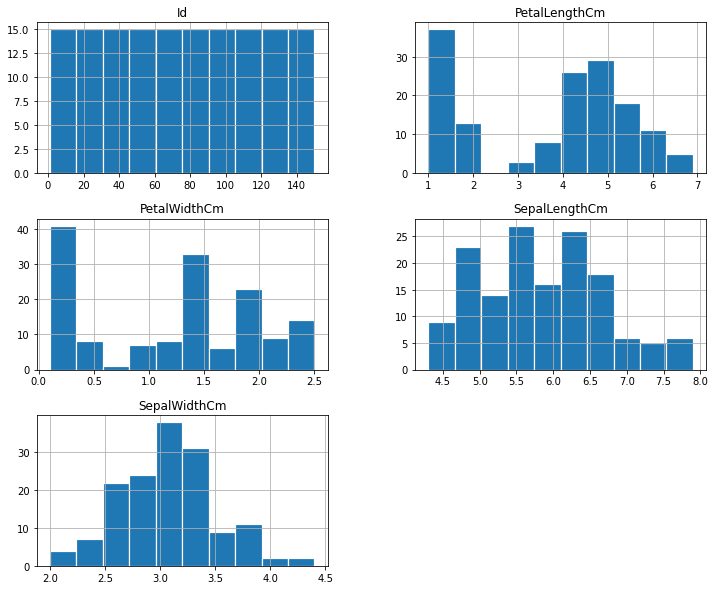

In [21]:
# 使用直方圖顯示每個欄位的值域的數量分布
import matplotlib.pyplot as plt

iris.hist(edgecolor='white', linewidth=1.2)   #間隔線與寬度
fig=plt.gcf()  # Get the current figure.
fig.set_size_inches(12,10)
plt.show()

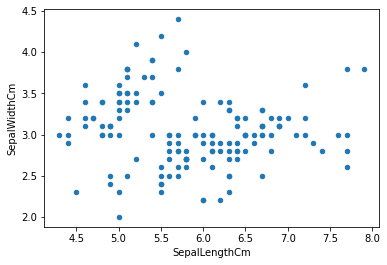

In [22]:
# 先使用兩個欄位來簡單看一下資料的分布
# 使用pandas內建的方式
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

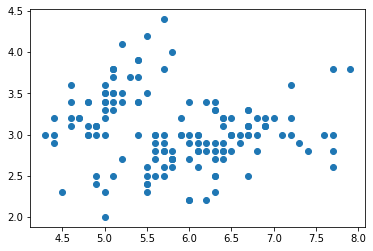

In [23]:
# 使用matplotlib畫跟上面一樣的圖
plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'])

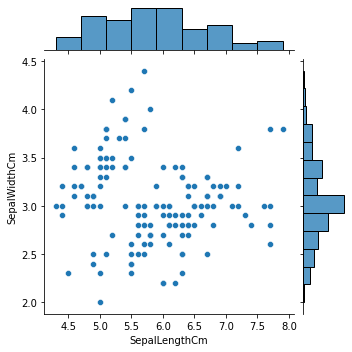

In [24]:
# seaborn是一個可以搭配pandas使用的圖形視覺化工具
import seaborn as sns

# 畫出跟上面一樣的圖，但是多了欄位值數量的分布
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, height=5)

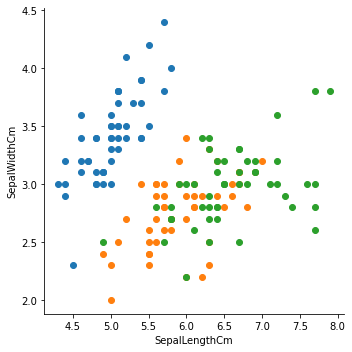

In [25]:
# 將不同類別的資料加入顏色
sns.FacetGrid(iris, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm")

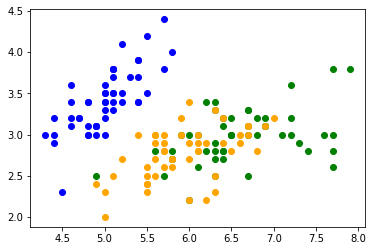

In [26]:
# 使用matplotlib達成上面相同的結果
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
sub_data = iris[iris['Species']=='Iris-virginica']
plt.scatter(sub_data['SepalLengthCm'], sub_data['SepalWidthCm'],c='green')
sub_data = iris[iris['Species']=='Iris-setosa']
plt.scatter(sub_data['SepalLengthCm'], sub_data['SepalWidthCm'],c='blue')
sub_data = iris[iris['Species']=='Iris-versicolor']
plt.scatter(sub_data['SepalLengthCm'], sub_data['SepalWidthCm'],c='orange')

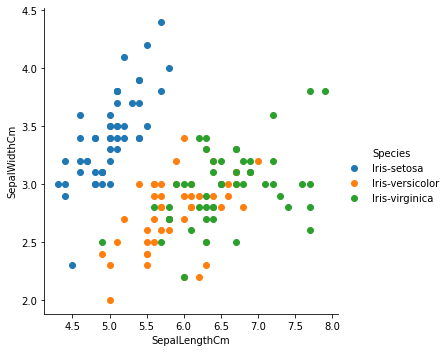

In [27]:
# 加上類別指示
sns.FacetGrid(iris, hue="Species", height=5) \
    .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
    .add_legend()

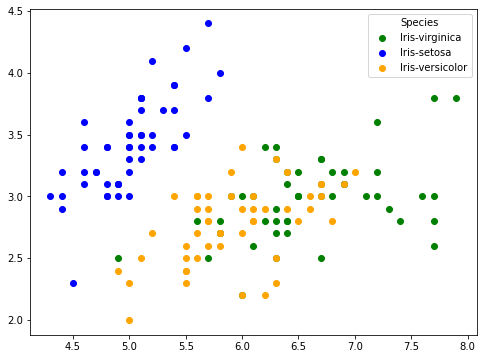

In [28]:
# 使用matplotlib達成上面相同的結果
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
plt.figure(figsize=(8,6)) #圖形大小
sub_data = iris[iris['Species']=='Iris-virginica']
plt.scatter(sub_data['SepalLengthCm'], sub_data['SepalWidthCm'],c='green'
            ,label='Iris-virginica')
sub_data = iris[iris['Species']=='Iris-setosa']
plt.scatter(sub_data['SepalLengthCm'], sub_data['SepalWidthCm'],c='blue'
            ,label='Iris-setosa')
sub_data = iris[iris['Species']=='Iris-versicolor']
plt.scatter(sub_data['SepalLengthCm'], sub_data['SepalWidthCm'],c='orange'
            ,label='Iris-versicolor')
plt.legend(title='Species', #標籤的標題
           loc=0 #標籤位置
          )

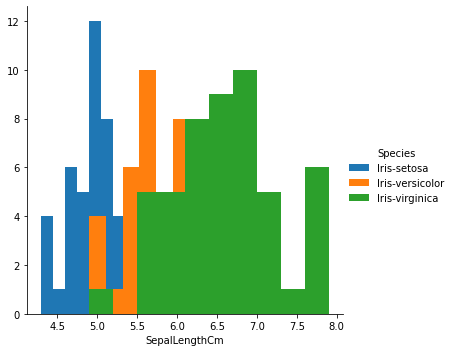

In [29]:
# 畫特定欄位值的數量分布直方圖
sns.FacetGrid(iris, hue="Species", height=5) \
.map(plt.hist, "SepalLengthCm").add_legend()

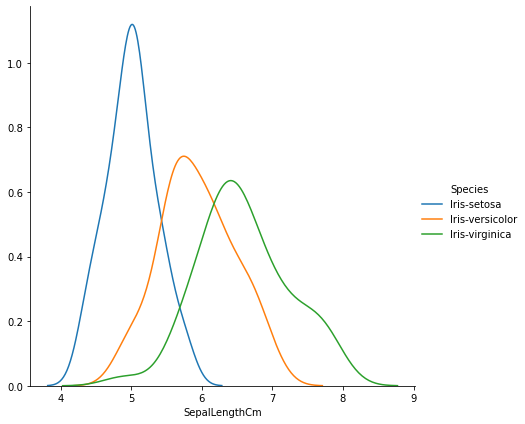

In [30]:
# 畫出單維度的密度圖
sns.FacetGrid(iris, hue="Species", height=6) \
   .map(sns.kdeplot, "SepalLengthCm") \
   .add_legend()

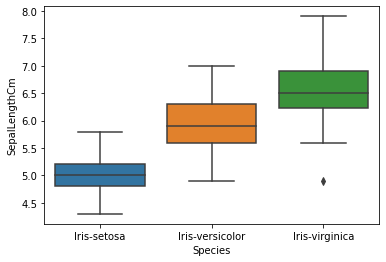

In [31]:
# 箱型圖
sns.boxplot(x="Species", y="SepalLengthCm", data=iris)

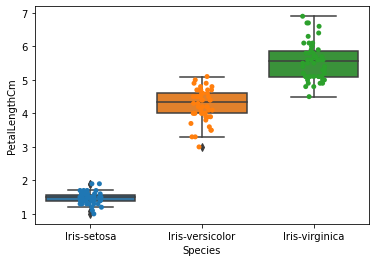

In [32]:
# 結合箱型圖跟點分布圖
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa84a13cac0>,
      dtype=object)

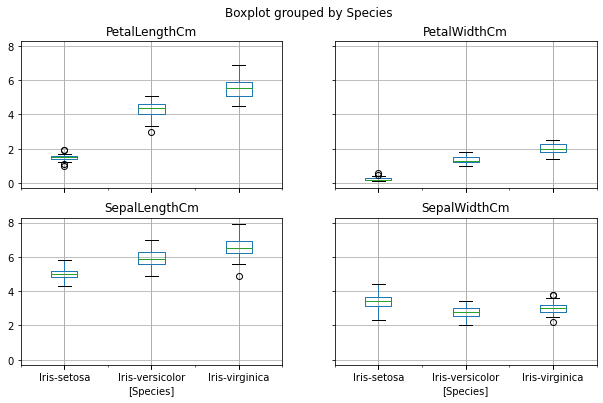

In [33]:
# 使用pandas內建的方法來畫盒狀圖
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(10, 6))

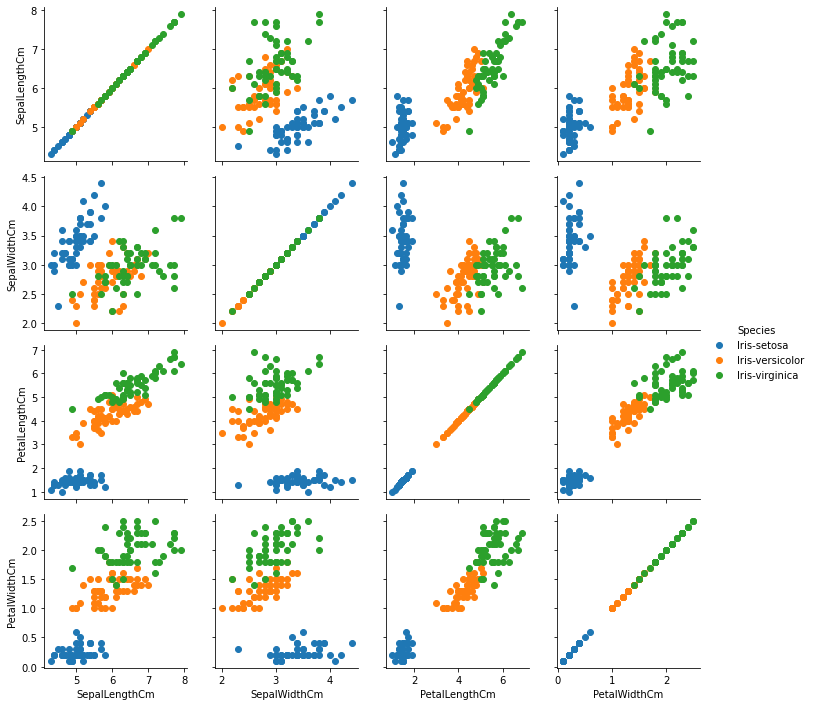

In [34]:
# 畫出兩兩欄位對應的點分布圖，用來觀看那些維度容易分離資料
sns.PairGrid(iris.drop("Id", axis=1), hue="Species").map(plt.scatter).add_legend()

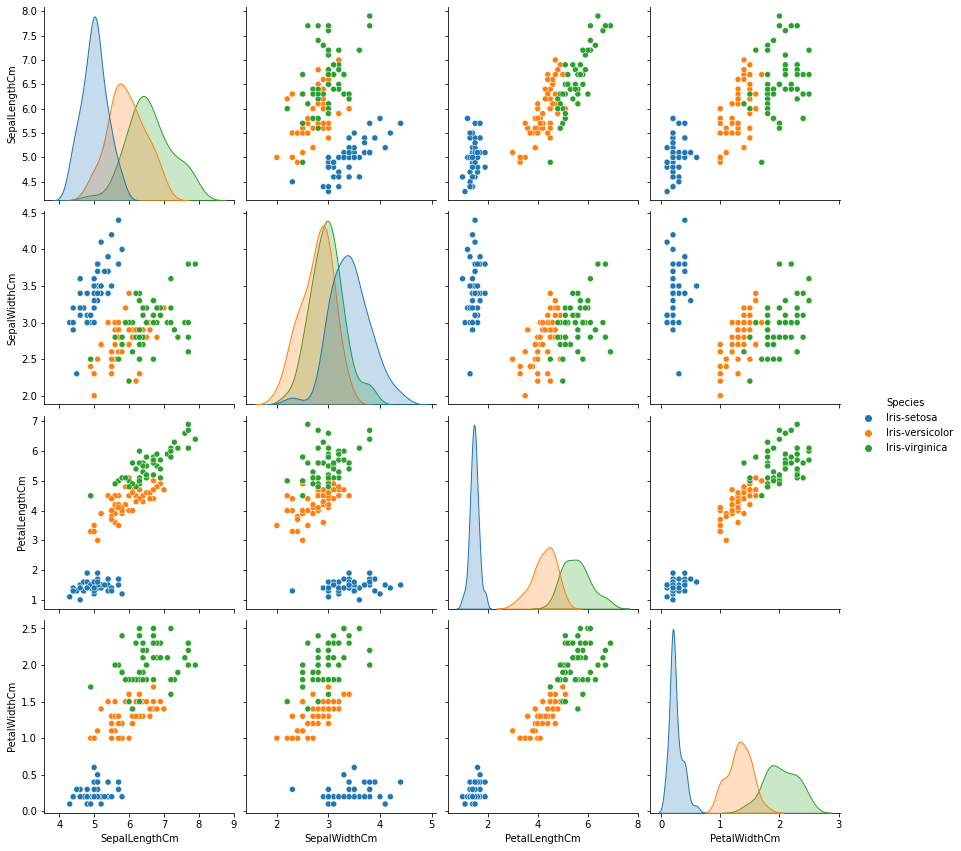

In [35]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", height=3)

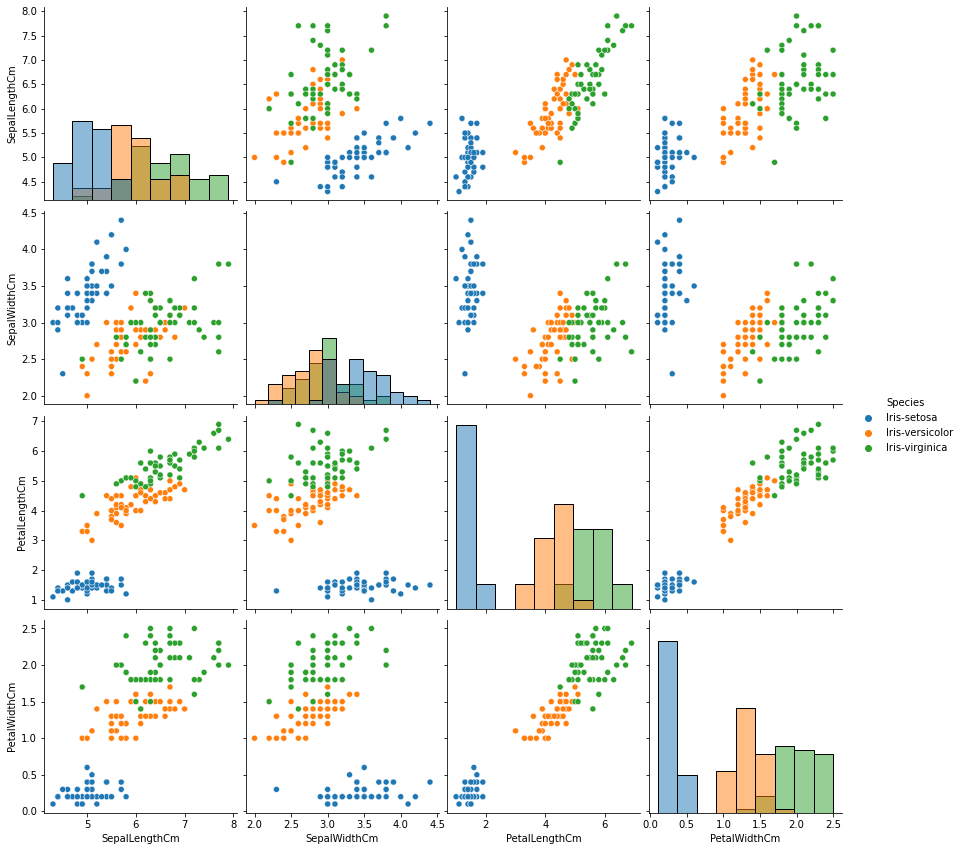

In [36]:
# 可以利用diag_kind參數來指定對角的圖為直方圖
sns.pairplot(iris.drop("Id", axis=1), hue="Species", height=3, diag_kind="hist")

# 資料分析

In [37]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
import numpy as np

In [38]:
# 因為ID這個欄位沒有實質意義，所以可以去掉以避免分析與預測的干擾。
# inplace 這個參數可以讓資料的修改直接影響物件本身
iris = pd.read_csv("data/Iris.csv")
iris.drop('Id',axis=1,inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
# 觀測倆倆維度的關聯性
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


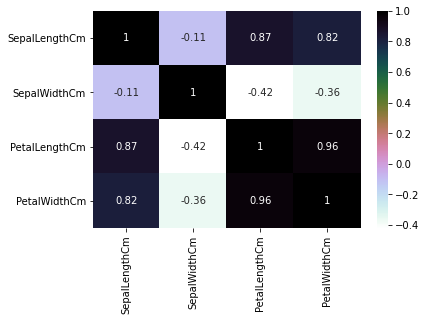

In [40]:
# 用視覺化的方式來觀看維度間的關聯性
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')

In [41]:
# 將資料分成訓練組與測試組
train, test = train_test_split(iris, test_size = 0.3)
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)
test.head()

(105, 5)
(45, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
52,6.9,3.1,4.9,1.5,Iris-versicolor
19,5.1,3.8,1.5,0.3,Iris-setosa
149,5.9,3.0,5.1,1.8,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
51,6.4,3.2,4.5,1.5,Iris-versicolor


In [42]:
# 將資料再分割成輸入欄位與輸出欄位(預測目標)
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y = train.Species# output of our training data
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y = test.Species   #output value of test data

In [43]:
# Support Vector Machine (SVM)
model = svm.SVC() #準備SVM物件模組
model.fit(train_X,train_y) #訓練模組
prediction = model.predict(test_X) #使用訓練好的模組來測試
print('The accuracy of the SVM is:',
      metrics.accuracy_score(prediction,test_y))
prediction

The accuracy of the SVM is: 0.9333333333333333


array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [44]:
# 增加一個欄位用來檢視預測結果
test2 = test.copy()
test2['prediction'] = prediction
test2['isCorrect'] = (test2['prediction'] == test2['Species'])
test2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,prediction,isCorrect
52,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor,True
19,5.1,3.8,1.5,0.3,Iris-setosa,Iris-setosa,True
149,5.9,3.0,5.1,1.8,Iris-virginica,Iris-virginica,True
144,6.7,3.3,5.7,2.5,Iris-virginica,Iris-virginica,True
51,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor,True
83,6.0,2.7,5.1,1.6,Iris-versicolor,Iris-virginica,False
55,5.7,2.8,4.5,1.3,Iris-versicolor,Iris-versicolor,True
45,4.8,3.0,1.4,0.3,Iris-setosa,Iris-setosa,True
106,4.9,2.5,4.5,1.7,Iris-virginica,Iris-versicolor,False
35,5.0,3.2,1.2,0.2,Iris-setosa,Iris-setosa,True


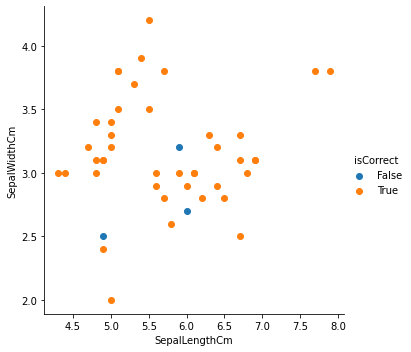

In [45]:
# 畫出預測結果
sns.FacetGrid(test2, hue="isCorrect", height=5) \
    .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
    .add_legend()

In [46]:
# Logistic Regression
model = LogisticRegression(max_iter=10000)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is',
      metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9333333333333333


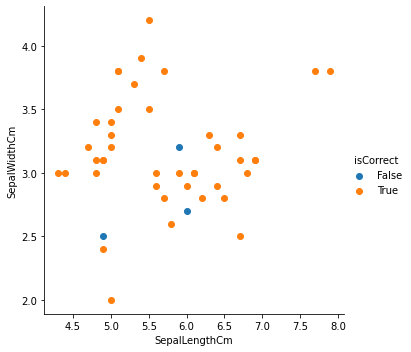

In [47]:
# 畫出預測結果
test2 = test.copy()
test2['prediction'] = prediction
test2['isCorrect'] = (test2['prediction'] == test2['Species'])
sns.FacetGrid(test2, hue="isCorrect", height=5) \
    .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
    .add_legend()

In [48]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9333333333333333


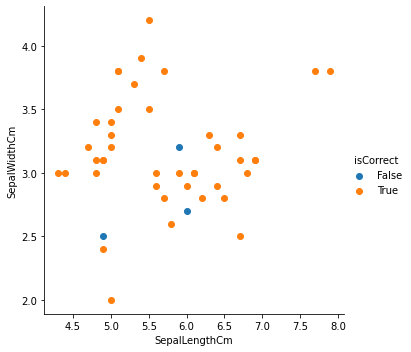

In [49]:
# 畫出預測結果
test2 = test.copy()
test2['prediction'] = prediction
test2['isCorrect'] = (test2['prediction'] == test2['Species'])
sns.FacetGrid(test2, hue="isCorrect", height=5) \
    .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
    .add_legend()

In [50]:
# K-Nearest Neighbours
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9555555555555556


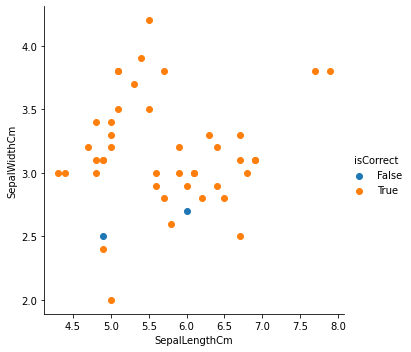

In [51]:
# 畫出預測結果
test2 = test.copy()
test2['prediction'] = prediction
test2['isCorrect'] = (test2['prediction'] == test2['Species'])
sns.FacetGrid(test2, hue="isCorrect", height=5) \
    .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
    .add_legend()

([<matplotlib.axis.XTick at 0x7fa84dd94cd0>,
 <a list of 10 Text major ticklabel objects>)

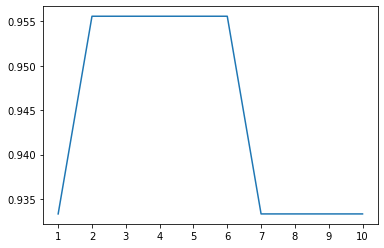

In [52]:
# the accuracy for various values of n for K-Nearest nerighbours
a_index=list(range(1,11))
a=pd.Series(dtype='float64')
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)